In [38]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.datasets import make_circles 
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

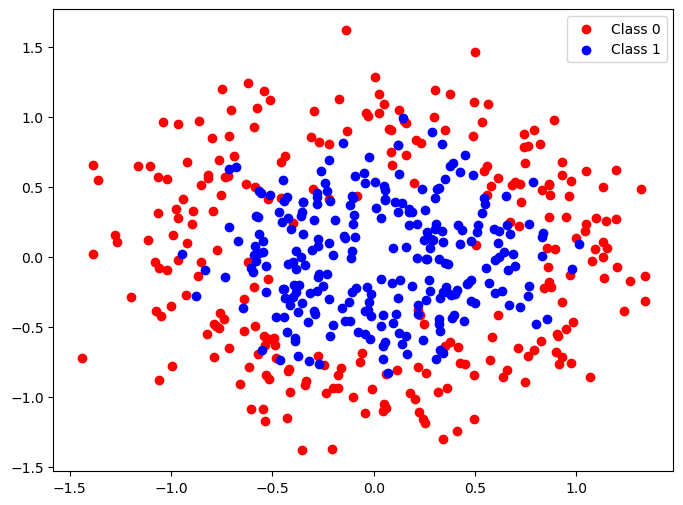

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

plt.legend()
plt.show()

## **1. Without BatchNormalization**

In [41]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5406 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6931
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4923 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6930
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5018 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6929
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4779 - loss: 0.6925 - val_accuracy: 0.4500 - val_loss: 0.6928
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5162 - loss: 0.6918 - val_accuracy: 0.4500 - val_loss: 0.6928
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5016 - loss: 0.6918 - val_accuracy: 0.4500 - val_loss: 0.6927
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5295 - loss: 0.6913 - val_accuracy: 0.4500 - val_loss: 0.6928
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5248 - loss: 0.6910 - val_accuracy: 0.4500 -

## **With Batch Normalization**

In [44]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5117 - loss: 0.8734 - val_accuracy: 0.5800 - val_loss: 0.7151
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4623 - loss: 0.8905 - val_accuracy: 0.5600 - val_loss: 0.7181
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4956 - loss: 0.8441 - val_accuracy: 0.5600 - val_loss: 0.7205
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5285 - loss: 0.8010 - val_accuracy: 0.5200 - val_loss: 0.7226
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4891 - loss: 0.8163 - val_accuracy: 0.4800 - val_loss: 0.7243
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5445 - loss: 0.7473 - val_accuracy: 0.4700 - val_loss: 0.7257
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5285 - loss: 0.7722 - val_accuracy: 0.4500 - val_loss: 0.7263
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5126 - loss: 0.7845 - val_accuracy: 0.45

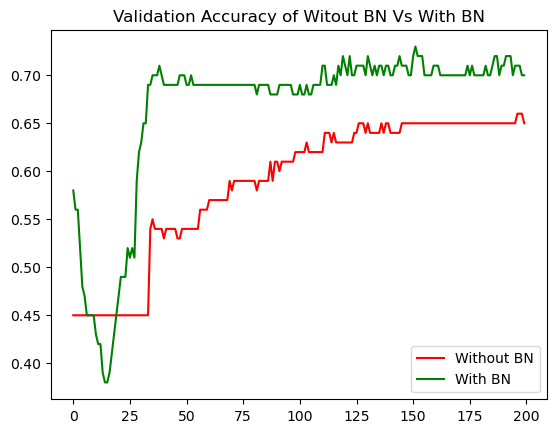

In [57]:
plt.plot(history1.history['val_accuracy'],color='red',label='Without BN')
plt.plot(history2.history['val_accuracy'],color='green',label='With BN')
plt.title('Validation Accuracy of Witout BN Vs With BN')
plt.legend()
plt.show()

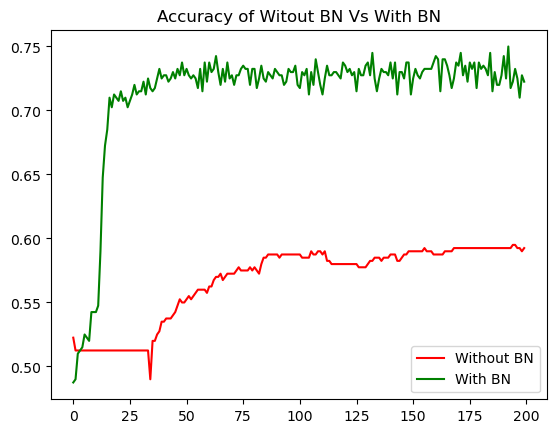

In [58]:
plt.plot(history1.history['accuracy'],color='red',label='Without BN')
plt.plot(history2.history['accuracy'],color='green',label='With BN')
plt.title('Accuracy of Witout BN Vs With BN')
plt.legend()
plt.show()